In [9]:
from keras.models import load_model
import librosa
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

mymodel = load_model("neomokbo.h5")

In [7]:
def CutSoundHalfSec(datas, sr):
    data = pd.DataFrame(columns=["feature", "label"])
    adddata = pd.DataFrame(columns=["feature", "label"])
    for i in range(0, len(datas) // (sr // 2)):
        segment = datas[(sr // 2) * i : (sr // 2) * (i + 1)]
        if len(segment) == sr // 2:  # 0.5초 길이인 경우에만 처리
            mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=20)
            adddata = pd.DataFrame({"feature": [mfcc]})
            data = pd.concat([data, adddata])
    return data

[0.         0.         0.         ... 0.00174143 0.00400155 0.00129619]
(53361,)
                                             feature label
0  [[-1131.3708, -1131.3708, -1131.3708, -1131.37...   NaN
0  [[-778.1859, -753.8335, -760.65454, -749.4837,...   NaN
0  [[-493.43933, -496.59552, -542.8763, -590.4148...   NaN
0  [[-807.6268, -772.35065, -770.72974, -771.7827...   NaN


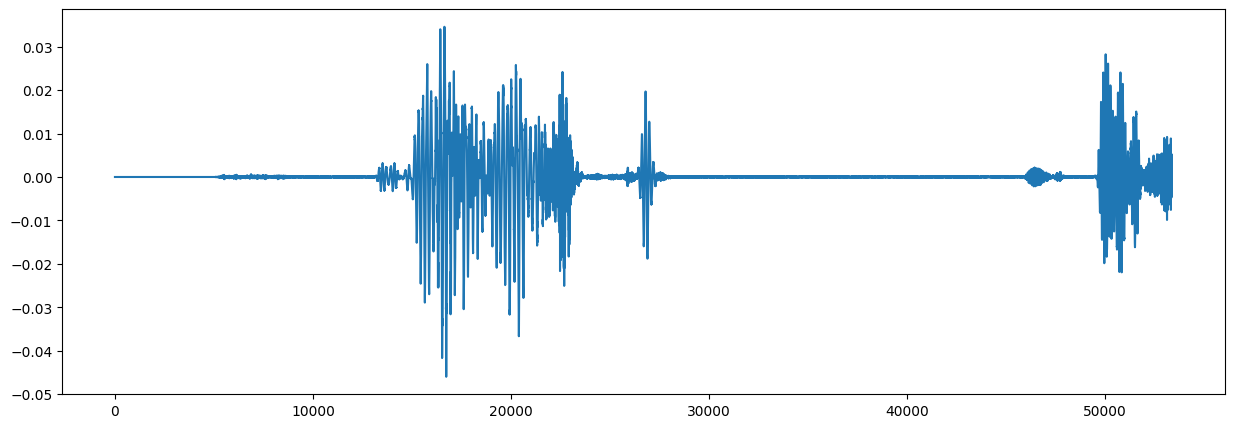

1/1 [==============================] - 0s 18ms/step
0 0 99 0


In [20]:
# 테스트 해보기


y, sr = librosa.load("./envtest.wav")
test = CutSoundHalfSec(y, sr)

print(y)
print(y.shape)
print(test)

plt.figure(figsize=(15, 5))
plt.plot(y)
plt.show()

# print(test.feature.iloc[0])
pred_test = mymodel.predict(np.array([test.feature.iloc[0]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
